## FULLY-CONNECTED NN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings("ignore")


data = pd.read_csv('AQI and Lat Long of Countries.csv')

data['AQI Category'].replace({'Good': 0, 'Moderate': 1, 'Unhealthy for Sensitive Groups': 2, 
     'Unhealthy': 3, 'Very Unhealthy': 4, 'Hazardous': 5}, inplace=True )

selected_columns = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 
                    'NO2 AQI Value', 'PM2.5 AQI Value', 'AQI Category']
data = data[selected_columns]

data['AQI Category'] = data['AQI Category'].astype(int)

data

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,AQI Category
0,51,1,36,0,51,1
1,41,1,5,1,41,0
2,41,1,5,1,41,0
3,66,1,39,2,66,1
4,34,1,34,0,20,0
...,...,...,...,...,...,...
16690,54,1,34,5,54,1
16691,71,1,39,1,71,1
16692,71,1,39,1,71,1
16693,50,1,20,5,50,0


In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = data.drop('AQI Category', axis=1)
labels = data['AQI Category'].values

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.3, stratify=labels)

In [6]:
num_classes = np.max(labels) + 1
y_train_encoded = np.eye(num_classes)[y_train]
y_test_encoded = np.eye(num_classes)[y_test]

In [11]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [9]:
neural_net = Sequential([
    Dense(256, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(num_classes, activation='softmax')
])

In [12]:
neural_net.compile(
    loss='categorical_crossentropy', 
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy'])

In [13]:
training_history = neural_net.fit(
    X_train, y_train_encoded, 
    validation_data=(X_test, y_test_encoded),
    epochs=100, 
    batch_size=64
)

Epoch 1/100
183/183 [==============================] - 2s 7ms/step - loss: 0.7049 - accuracy: 0.7808 - val_loss: 0.2430 - val_accuracy: 0.9114
Epoch 2/100
183/183 [==============================] - 1s 5ms/step - loss: 0.1956 - accuracy: 0.9324 - val_loss: 0.1377 - val_accuracy: 0.9607
Epoch 3/100
183/183 [==============================] - 1s 7ms/step - loss: 0.1452 - accuracy: 0.9449 - val_loss: 0.1430 - val_accuracy: 0.9379
Epoch 4/100
183/183 [==============================] - 1s 5ms/step - loss: 0.1162 - accuracy: 0.9568 - val_loss: 0.0977 - val_accuracy: 0.9709
Epoch 5/100
183/183 [==============================] - 1s 5ms/step - loss: 0.1189 - accuracy: 0.9518 - val_loss: 0.0867 - val_accuracy: 0.9583
Epoch 6/100
183/183 [==============================] - 1s 5ms/step - loss: 0.0969 - accuracy: 0.9613 - val_loss: 0.0758 - val_accuracy: 0.9647
Epoch 7/100
183/183 [==============================] - 1s 5ms/step - loss: 0.0848 - accuracy: 0.9697 - val_loss: 0.0847 - val_accuracy: 0.9575

In [14]:
predicted_probs = neural_net.predict(X_test)
predicted_classes = np.argmax(predicted_probs, axis=1)
true_classes = np.argmax(y_test_encoded, axis=1)

157/157 [==============================] - 1s 3ms/step


In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.9760431223797165


In [17]:
classification_rep = classification_report(true_classes, predicted_classes)
print(classification_rep)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      2313
           1       0.95      1.00      0.98      2116
           2       1.00      1.00      1.00       261
           3       0.95      1.00      0.97       261
           4       1.00      0.67      0.80        39
           5       1.00      1.00      1.00        19

    accuracy                           0.98      5009
   macro avg       0.98      0.94      0.95      5009
weighted avg       0.98      0.98      0.98      5009



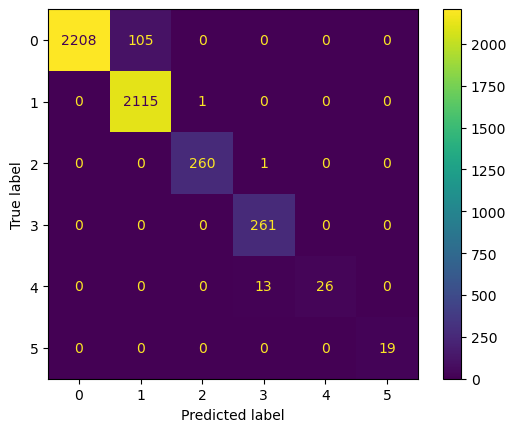

In [18]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

In [19]:
def plot_training_history(history):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Точність
    axes[0].plot(history.history['accuracy'], label='Train Accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axes[0].set_title('Model Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend(loc='best')

    # Втрата
    axes[1].plot(history.history['loss'], label='Train Loss')
    axes[1].plot(history.history['val_loss'], label='Validation Loss')
    axes[1].set_title('Model Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend(loc='best')

    plt.show()

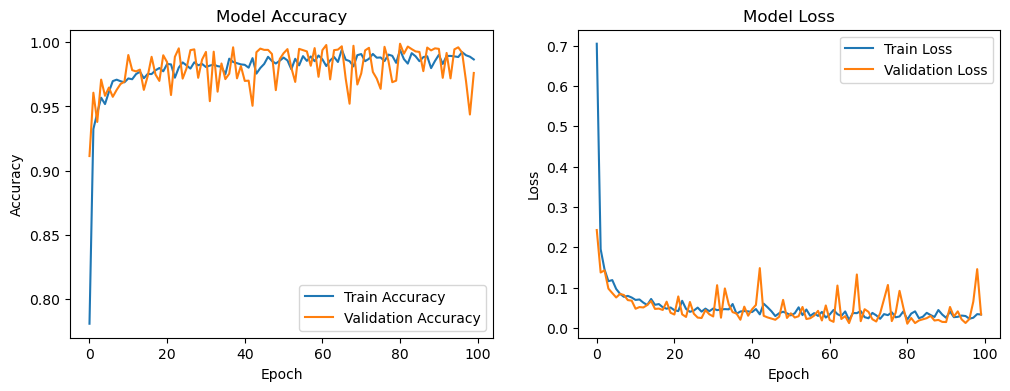

In [20]:
plot_training_history(training_history)

#### In the first Lab the best score was for Descion Trees (Accuracy - 1, F-1 Score - 1). Here we got something really close

## RNN

In [21]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

import re
import string

In [22]:
train_data = pd.read_csv('Sciences train.csv') 
test_data = pd.read_csv('Sciences test.csv')

train_data

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,Biology
1,0xbf0,Is it so hard to believe that there exist part...,Physics
2,0x1dfc,There are bees,Biology
3,0xc7e,I'm a medication technician. And that's alot o...,Biology
4,0xbba,Cesium is such a pretty metal.,Chemistry
...,...,...,...
8690,0x1e02,I make similar observations over the last week...,Biology
8691,0xc8d,You would know.,Biology
8692,0x723,Also use the correct number of sig figs,Chemistry
8693,0x667,"What about the ethical delimmas, groundbreaki...",Biology


In [23]:
print(train_data.Topic.value_counts())
print('\n')
print(test_data.Topic.value_counts())

Topic
Biology      3591
Chemistry    2920
Physics      2184
Name: count, dtype: int64


Topic
Biology      614
Chemistry    506
Physics      466
Name: count, dtype: int64


In [24]:
train_data = train_data[['Comment','Topic']]
test_data = test_data[['Comment', 'Topic']]

In [25]:
lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
def clean_text(text):
    text = text.lower()
    # remove mentions
    text = re.sub('@\S+', ' ', text)
    # remove url
    text = re.sub('https*\S+', ' ', text)
    # remove hashtags
    text = re.sub('#\S+', ' ', text)
    # remove all numbers
    text = re.sub('\d', ' ', text)
    # remove punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    # remove extra spaces
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}', ' ', text)
    # stopwords     
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    # Tokenize the text
    words = text.split()
    # Lemmatization and remove stopwords
    text = ' '.join([lemmatizer.lemmatize(word) for word in words if word not in stop_words])
    # remove non-Latin characters
    text = re.sub('[^a-zA-Z\s]', '', text)
    return text

In [26]:
train_data.Comment=train_data.Comment.apply(clean_text)
test_data.Comment=test_data.Comment.apply(clean_text)
train_data

,Comment,Topic
0,thing might negative frequency dependent selec...,Biology
1,hard believe exist particular detect anything ...,Physics
2,bee,Biology
3,medication technician alot drug liver probably...,Biology
4,cesium pretty metal,Chemistry
...,...,...
8690,make similar observation last week southern ge...,Biology
8691,would know,Biology
8692,also use correct number sig fig,Chemistry
8693,ethical delimmas groundbreaking technology fut...,Biology


In [29]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences, to_categorical
from sklearn.preprocessing import LabelEncoder

X_train = train_data['Comment'].values
X_test = test_data['Comment'].values

y_train = train_data['Topic']
y_test =  test_data['Topic']

max_words = 10000
max_len = 150
tokenizer = Tokenizer(num_words=max_words, lower=True, split=' ')
tokenizer.fit_on_texts(X_train)

X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=max_len)
X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test), maxlen=max_len)

encoder = LabelEncoder()
y_train_encoded = to_categorical(encoder.fit_transform(y_train))
y_test_encoded = to_categorical(encoder.transform(y_test))

In [31]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

embedding_dim = 64
model_scratch = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(y_train_encoded.shape[1], activation='softmax')
])

In [32]:
model_scratch.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_scratch.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 64)           640000    
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 3)                 195       
                                                                 
Total params: 673,219
Trainable params: 673,219
Non-trainable params: 0
_________________________________________________________________


In [33]:
history_scratch = model_scratch.fit(X_train_seq, y_train_encoded, validation_data=(X_test_seq, y_test_encoded),
                                    epochs=10, batch_size=128)

Epoch 1/10
68/68 [==============================] - 17s 169ms/step - loss: 1.0605 - accuracy: 0.4230 - val_loss: 0.9120 - val_accuracy: 0.4874
Epoch 2/10
68/68 [==============================] - 12s 174ms/step - loss: 0.9216 - accuracy: 0.6498 - val_loss: 0.7972 - val_accuracy: 0.6828
Epoch 3/10
68/68 [==============================] - 16s 234ms/step - loss: 0.6506 - accuracy: 0.7714 - val_loss: 0.5916 - val_accuracy: 0.7661
Epoch 4/10
68/68 [==============================] - 10s 146ms/step - loss: 0.4674 - accuracy: 0.8268 - val_loss: 0.5850 - val_accuracy: 0.8146
Epoch 5/10
68/68 [==============================] - 10s 145ms/step - loss: 0.3542 - accuracy: 0.8734 - val_loss: 0.6451 - val_accuracy: 0.7976
Epoch 6/10
68/68 [==============================] - 10s 145ms/step - loss: 0.2878 - accuracy: 0.8930 - val_loss: 0.7418 - val_accuracy: 0.8071
Epoch 7/10
68/68 [==============================] - 13s 194ms/step - loss: 0.2416 - accuracy: 0.9078 - val_loss: 0.9285 - val_accuracy: 0.7881

In [34]:
y_pred_probs_scratch = model_scratch.predict(X_test_seq)
y_pred_scratch = y_pred_probs_scratch.argmax(axis=1)
y_test_labels = y_test_encoded.argmax(axis=1)

50/50 [==============================] - 3s 27ms/step


In [36]:
accuracy = accuracy_score(y_test_labels, y_pred_scratch)
print("Accuracy:", accuracy)

Accuracy: 0.78562421185372


              precision    recall  f1-score   support

           0       0.86      0.75      0.80       614
           1       0.71      0.82      0.76       506
           2       0.79      0.79      0.79       466

    accuracy                           0.79      1586
   macro avg       0.79      0.79      0.79      1586
weighted avg       0.79      0.79      0.79      1586



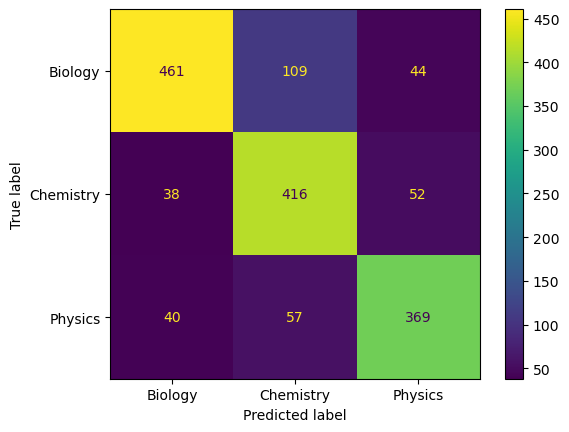

In [35]:
print(classification_report(y_test_labels, y_pred_scratch))
cm_scratch = confusion_matrix(y_test_labels, y_pred_scratch)
ConfusionMatrixDisplay(confusion_matrix=cm_scratch, display_labels=encoder.classes_).plot()

## In Lab 2:

Logistic Regression:
* accuracy - 0.83
* f-1 score - 0.83

Naive Bayes:
* accuracy - 0.85
* f-1 score - 0.85

## In this lab:

RNN:
* accuracy - 0.79
* f-1 score - 0.79

## CNN

In [37]:
import os

In [38]:
train_dir = 'C:/Users/Тимофей/Desktop/Backups/train'
filepaths = []
labels = []

folds = os.listdir(train_dir)
for fold in folds:
    foldpath = os.path.join(train_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.concat([Fseries, Lseries], axis= 1)

In [39]:
train_df

,filepaths,labels
0,C:/Users/Тимофей/Desktop/Backups/train\adidas\...,adidas
1,C:/Users/Тимофей/Desktop/Backups/train\adidas\...,adidas
2,C:/Users/Тимофей/Desktop/Backups/train\adidas\...,adidas
3,C:/Users/Тимофей/Desktop/Backups/train\adidas\...,adidas
4,C:/Users/Тимофей/Desktop/Backups/train\adidas\...,adidas
...,...,...
706,C:/Users/Тимофей/Desktop/Backups/train\nike\95...,nike
707,C:/Users/Тимофей/Desktop/Backups/train\nike\96...,nike
708,C:/Users/Тимофей/Desktop/Backups/train\nike\97...,nike
709,C:/Users/Тимофей/Desktop/Backups/train\nike\98...,nike


In [40]:
test_dir = 'C:/Users/Тимофей/Desktop/Backups/test'
filepaths = []
labels = []

folds = os.listdir(test_dir)
for fold in folds:
    foldpath = os.path.join(test_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
test_df = pd.concat([Fseries, Lseries], axis= 1)

In [41]:
batch_size = 16
img_size = (256, 256)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

In [42]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  rotation_range=30,
                                  zoom_range=[0.95,1.00],
                                  brightness_range=[0.5,1])                              
test_datagen = ImageDataGenerator(rescale=1./255)

In [43]:
train_generator = train_datagen.flow_from_dataframe(train_df, x_col= 'filepaths', y_col= 'labels', 
                                                    target_size= img_size, class_mode= 'categorical',
                                                    color_mode= 'rgb', shuffle= True, 
                                                    batch_size= batch_size)

test_generator = test_datagen.flow_from_dataframe(test_df, x_col= 'filepaths', y_col= 'labels', 
                                                  target_size= img_size, class_mode= 'categorical',
                                                  color_mode= 'rgb', shuffle= False, 
                                                  batch_size= batch_size)

Found 711 validated image filenames belonging to 3 classes.
Found 114 validated image filenames belonging to 3 classes.


In [44]:
class_names = {v:k for k,v in train_generator.class_indices.items()}
images,labels = next(iter(train_generator))

In [45]:
X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)

In [46]:
X_train.shape, y_train.shape

((16, 256, 256, 3), (16, 3))

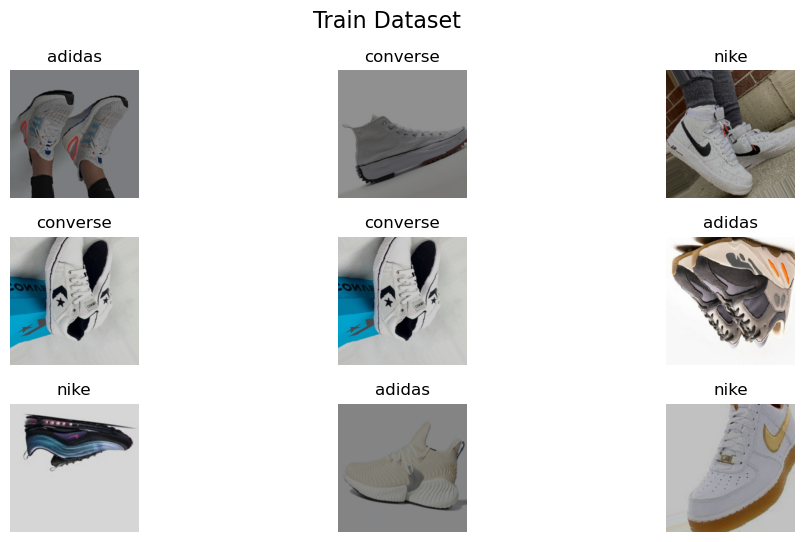

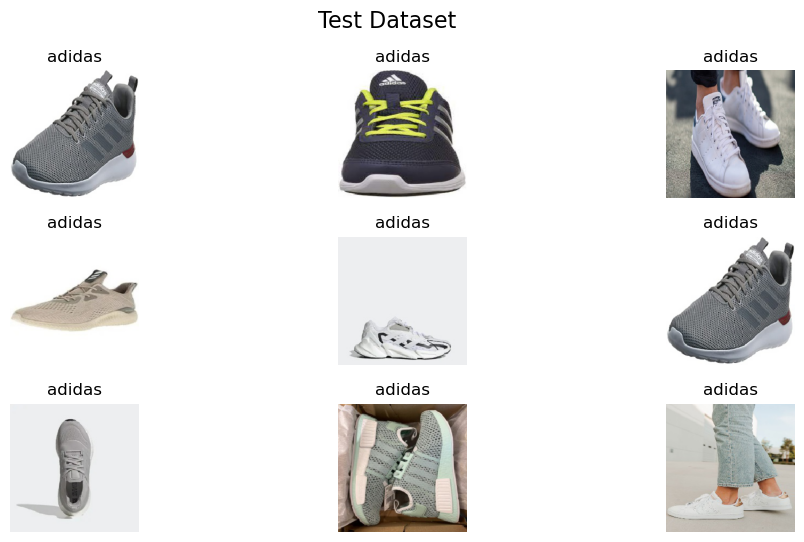

In [47]:
dataset_types = ['train', 'test']

for dataset_type in dataset_types:
    fig, axes = plt.subplots(3, 3, figsize=(12, 6))
    fig.suptitle(f"{dataset_type.capitalize()} Dataset", fontsize=16)
    
    if dataset_type == 'train':
        for i in range(9):
            j = np.random.randint(0, X_train.shape[0])
            axes[i // 3, i % 3].imshow(X_train[j])
            axes[i // 3, i % 3].set_title(class_names[int(np.where(y_train[j] != 0)[0])])
            axes[i // 3, i % 3].axis('off')
        fig.subplots_adjust(hspace=0.3)    
            
    elif dataset_type == 'test':
        for i in range(9):
            j = np.random.randint(0, X_test.shape[0])
            axes[i // 3, i % 3].imshow(X_test[j])
            axes[i // 3, i % 3].set_title(class_names[int(np.where(y_test[j] != 0)[0])])
            axes[i // 3, i % 3].axis('off')
        fig.subplots_adjust(hspace=0.3)

    plt.show()

In [49]:
from tensorflow.keras import layers, models

model_scratch = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=img_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

In [50]:
model_scratch.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

model_scratch.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)     

In [51]:
history_scratch = model_scratch.fit(train_generator, validation_data=test_generator,
                                    epochs=20, callbacks=[
                                        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
                                    ])

Epoch 1/20
45/45 [==============================] - 45s 970ms/step - loss: 1.1598 - accuracy: 0.3136 - val_loss: 1.0978 - val_accuracy: 0.3333
Epoch 2/20
45/45 [==============================] - 42s 916ms/step - loss: 1.1016 - accuracy: 0.3333 - val_loss: 1.0924 - val_accuracy: 0.4035
Epoch 3/20
45/45 [==============================] - 42s 921ms/step - loss: 1.0984 - accuracy: 0.3615 - val_loss: 1.0846 - val_accuracy: 0.3947
Epoch 4/20
45/45 [==============================] - 42s 918ms/step - loss: 1.0935 - accuracy: 0.3713 - val_loss: 1.0911 - val_accuracy: 0.4123
Epoch 5/20
45/45 [==============================] - 46s 1s/step - loss: 1.0976 - accuracy: 0.3544 - val_loss: 1.1010 - val_accuracy: 0.3333
Epoch 6/20
45/45 [==============================] - 46s 989ms/step - loss: 1.0898 - accuracy: 0.3685 - val_loss: 1.0860 - val_accuracy: 0.4035
Epoch 7/20
45/45 [==============================] - 43s 934ms/step - loss: 1.0855 - accuracy: 0.3797 - val_loss: 1.0635 - val_accuracy: 0.3947
Ep

In [52]:
y_pred_scratch = model_scratch.predict(test_generator).argmax(axis=1)
y_true = test_generator.classes


8/8 [==============================] - 2s 201ms/step


In [53]:
accuracy = accuracy_score(y_true, y_pred_scratch)
print(f"Test Set Accuracy: {accuracy:.2%}")

Test Set Accuracy: 44.74%


              precision    recall  f1-score   support

           0       0.43      0.68      0.53        38
           1       0.54      0.50      0.52        38
           2       0.33      0.16      0.21        38

    accuracy                           0.45       114
   macro avg       0.43      0.45      0.42       114
weighted avg       0.43      0.45      0.42       114



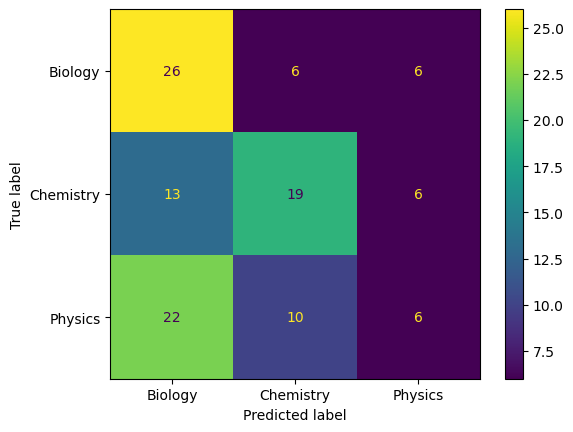

In [56]:
print(classification_report(y_true, y_pred_scratch))
cm_scratch = confusion_matrix(y_true, y_pred_scratch)
ConfusionMatrixDisplay(confusion_matrix=cm_scratch, display_labels=encoder.classes_).plot()

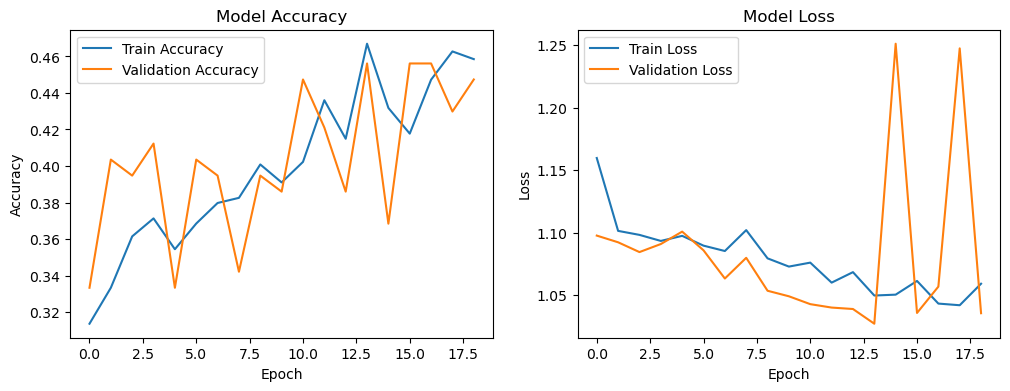

In [57]:
plot_training_history(history_scratch)

In [68]:
def plot_predictions1(model, data_generator, num_images=10):
    # Get class labels from the data generator
    class_labels = list(data_generator.class_indices.keys())
    
    # Generate predictions for the images in the generator
    predictions = model.predict(data_generator)

    # Get a batch of images and labels from the generator
    images, labels = data_generator.next()

    # Plot the images along with their predicted labels
    plt.figure(figsize=(15, 10))
    
    for i in range(num_images):
        plt.subplot(5, 2, i+1)
        plt.imshow(images[i])
        plt.suptitle('Test Set Predictions', fontsize=16)
        plt.title(f"True: {class_labels[np.argmax(labels[i])]}\nPredicted: {class_labels[np.argmax(predictions[i])]}")
        plt.axis('off')
        plt.subplots_adjust(hspace=.8)

    plt.show()

8/8 [==============================] - 2s 232ms/step


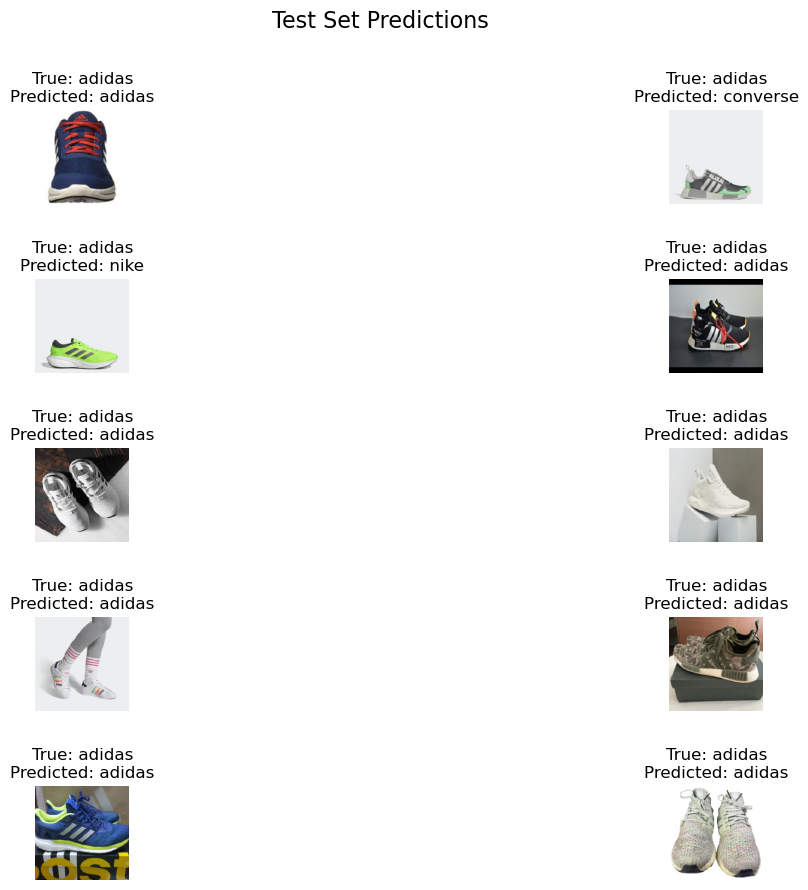

In [69]:
plot_predictions1(model_scratch, test_generator, num_images=10)

## Transfer learning

In [58]:
from tensorflow.keras.applications import InceptionV3

base_model = InceptionV3(input_shape=img_shape, include_top=False, weights='imagenet')
base_model.trainable = False 

In [59]:
model_transfer = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

In [60]:
model_transfer.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

model_transfer.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 73728)             0         
                                                                 
 dense_7 (Dense)             (None, 128)               9437312   
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 3)                 387       
                                                                 
Total params: 31,240,483
Trainable params: 9,437,699
Non-trainable params: 21,802,784
_________________________________________________________________


In [61]:
history_transfer = model_transfer.fit(train_generator, validation_data=test_generator,
                                      epochs=20, callbacks=[
                                          tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
                                      ])

Epoch 1/20
45/45 [==============================] - 109s 2s/step - loss: 16.3186 - accuracy: 0.3994 - val_loss: 4.1878 - val_accuracy: 0.3684
Epoch 2/20
45/45 [==============================] - 84s 2s/step - loss: 1.5715 - accuracy: 0.4430 - val_loss: 1.0939 - val_accuracy: 0.4649
Epoch 3/20
45/45 [==============================] - 81s 2s/step - loss: 0.9896 - accuracy: 0.5218 - val_loss: 0.9122 - val_accuracy: 0.5614
Epoch 4/20
45/45 [==============================] - 80s 2s/step - loss: 0.9016 - accuracy: 0.5570 - val_loss: 0.8310 - val_accuracy: 0.5877
Epoch 5/20
45/45 [==============================] - 80s 2s/step - loss: 0.8347 - accuracy: 0.5879 - val_loss: 0.8221 - val_accuracy: 0.6491
Epoch 6/20
45/45 [==============================] - 80s 2s/step - loss: 0.8185 - accuracy: 0.5977 - val_loss: 0.9162 - val_accuracy: 0.5965
Epoch 7/20
45/45 [==============================] - 80s 2s/step - loss: 0.8639 - accuracy: 0.5387 - val_loss: 0.8573 - val_accuracy: 0.6140
Epoch 8/20
45/45 [

In [62]:
y_pred_transfer = model_transfer.predict(test_generator).argmax(axis=1)

8/8 [==============================] - 16s 1s/step


In [63]:
y_true = test_generator.classes

In [64]:
accuracy = accuracy_score(y_true, y_pred_transfer)
print(f"Test Set Accuracy: {accuracy:.2%}")

Test Set Accuracy: 70.18%


              precision    recall  f1-score   support

           0       0.57      0.84      0.68        38
           1       0.93      0.74      0.82        38
           2       0.71      0.53      0.61        38

    accuracy                           0.70       114
   macro avg       0.74      0.70      0.70       114
weighted avg       0.74      0.70      0.70       114



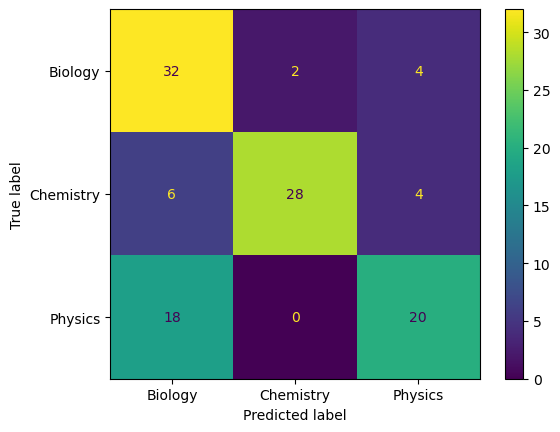

In [66]:
print(classification_report(y_true, y_pred_transfer))
cm_scratch = confusion_matrix(y_true, y_pred_transfer)
ConfusionMatrixDisplay(confusion_matrix=cm_scratch, display_labels=encoder.classes_).plot()

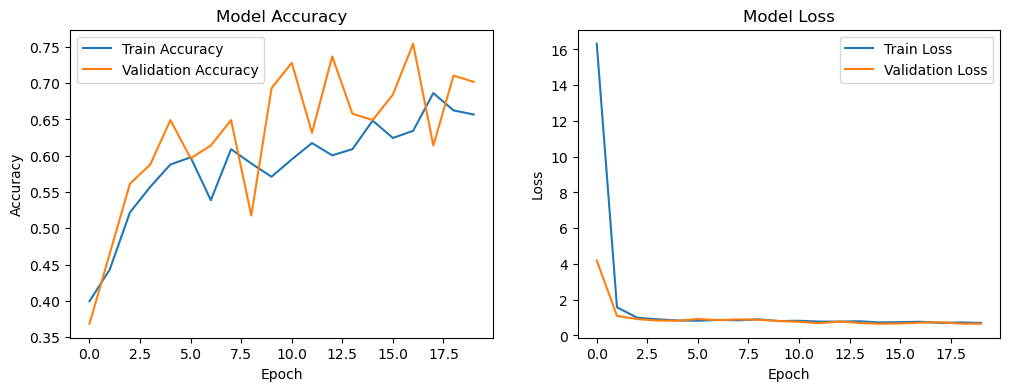

In [67]:
plot_training_history(history_transfer)

8/8 [==============================] - 11s 1s/step


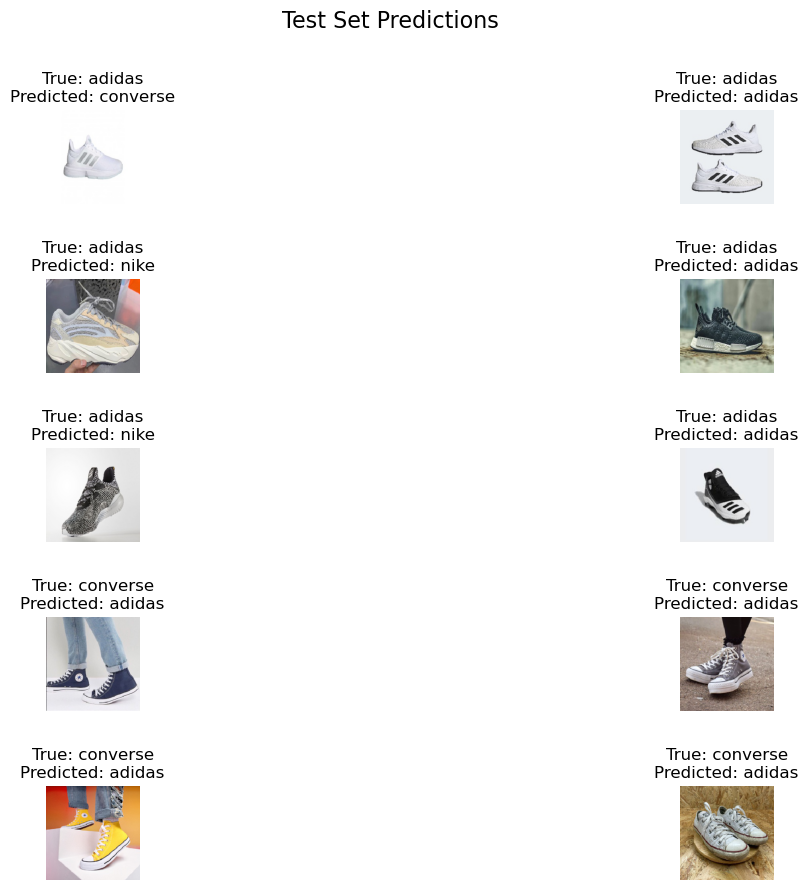

In [70]:
plot_predictions1(model_transfer, test_generator, num_images=10)

## For the first model: 
* Accuracy - 0.45
* F-1 score - 0.42

## For the second model:
* Accuracy - 0.7
* F-1 Score - 0.7